In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import umap.umap_ as umap

In [2]:
df = pd.read_csv('../../Datasets/shopping-data.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [8]:
ohet = ohe.fit_transform(df[['Genre']])

In [9]:
ohet

,Genre_Female,Genre_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
195,1.0,0.0
196,1.0,0.0
197,0.0,1.0
198,0.0,1.0


In [12]:
scaled = pd.DataFrame(StandardScaler().fit_transform(df.iloc[:,2:]))

In [13]:
scaled

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [16]:
X_scaled = pd.concat([scaled, ohet], axis=1)

In [17]:
X_scaled

,0,1,2,Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,1.0,0.0
196,0.441365,2.497807,-0.861839,1.0,0.0
197,-0.491602,2.497807,0.923953,0.0,1.0
198,-0.491602,2.917671,-1.250054,0.0,1.0


In [21]:
X_scaled = X_scaled.rename(columns={0:'Age', 1:'Annual Income (k$)', 2:'Spending Score (1-100)'})

In [22]:
X_scaled

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,1.0,0.0
196,0.441365,2.497807,-0.861839,1.0,0.0
197,-0.491602,2.497807,0.923953,0.0,1.0
198,-0.491602,2.917671,-1.250054,0.0,1.0


In [25]:
Z = linkage(X_scaled, method='ward')

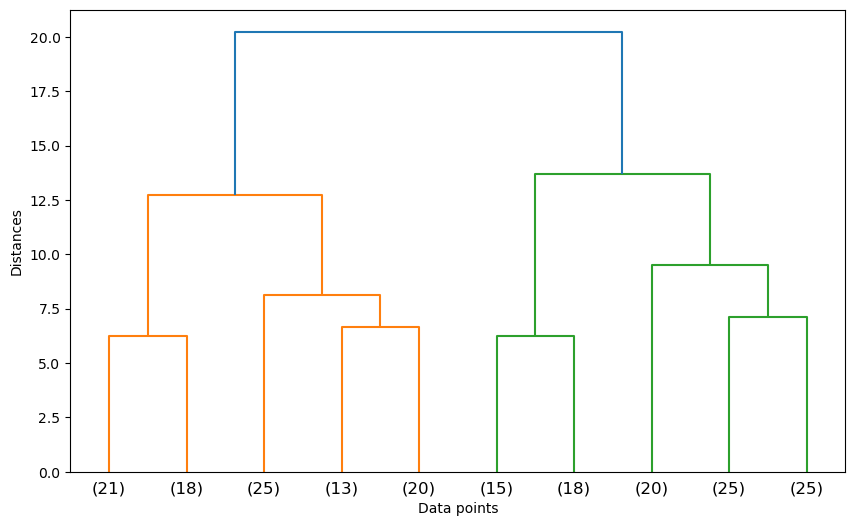

In [31]:
plt.figure(figsize=(10,6))
dendrogram(Z, truncate_mode='lastp', p=10)
plt.xlabel('Data points')
plt.ylabel('Distances')
plt.show()

In [32]:
clusters = fcluster(Z, t=4, criterion='maxclust')

### PCA

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA()

In [35]:
comps = pca.fit_transform(X_scaled)

In [36]:
pca.explained_variance_

array([1.33858719e+00, 1.00774493e+00, 6.76157705e-01, 4.87861928e-01,
       6.52076725e-17])

In [37]:
pca.explained_variance_ratio_

array([3.81325658e-01, 2.87078048e-01, 1.92618219e-01, 1.38978074e-01,
       1.85758229e-17])

In [38]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

<Axes: >

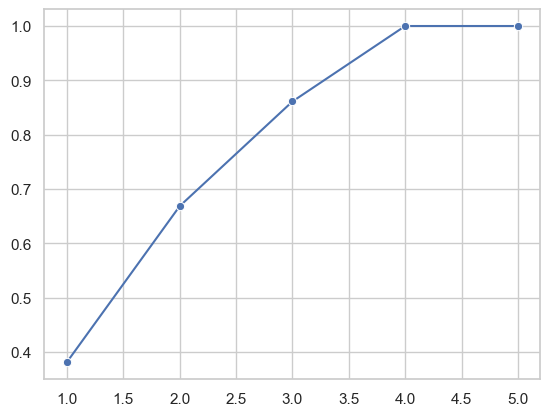

In [41]:
sns.set(style='whitegrid')
sns.lineplot(x=range(1, len(cumsum)+1), y=cumsum, marker='o')

In [42]:
pca = PCA(n_components=2)

In [44]:
p_comps = pca.fit_transform(X_scaled)

In [45]:
import plotly.express as px

In [48]:
plot_df = pd.DataFrame(p_comps, columns=['PCA 1','PCA 2'])
plot_df['clusters'] = clusters

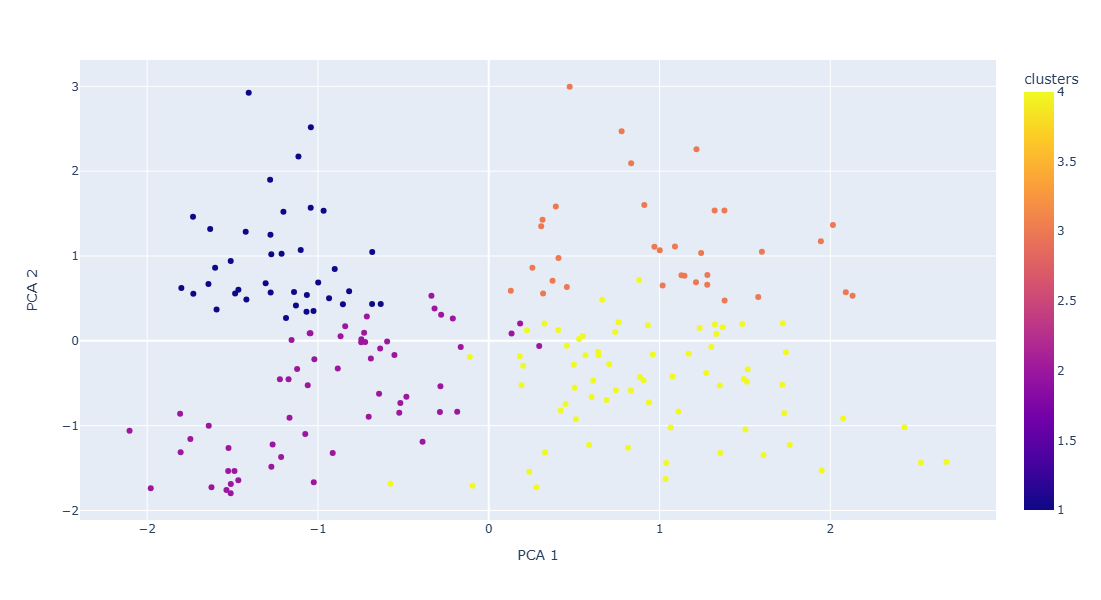

In [52]:
fig = px.scatter(
    plot_df,
    x='PCA 1',
    y='PCA 2',
    color='clusters',
    height=600,
    width=700
)
fig.show()

### UMAP

In [79]:
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=1, random_state=42, metric='euclidean')

In [80]:
embedding = reducer.fit_transform(X_scaled)

D:\PythonDS\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

D:\PythonDS\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [81]:
plot_df = pd.DataFrame(embedding, columns=['UMAP 1','UMAP 2'])
plot_df['clusters'] = clusters

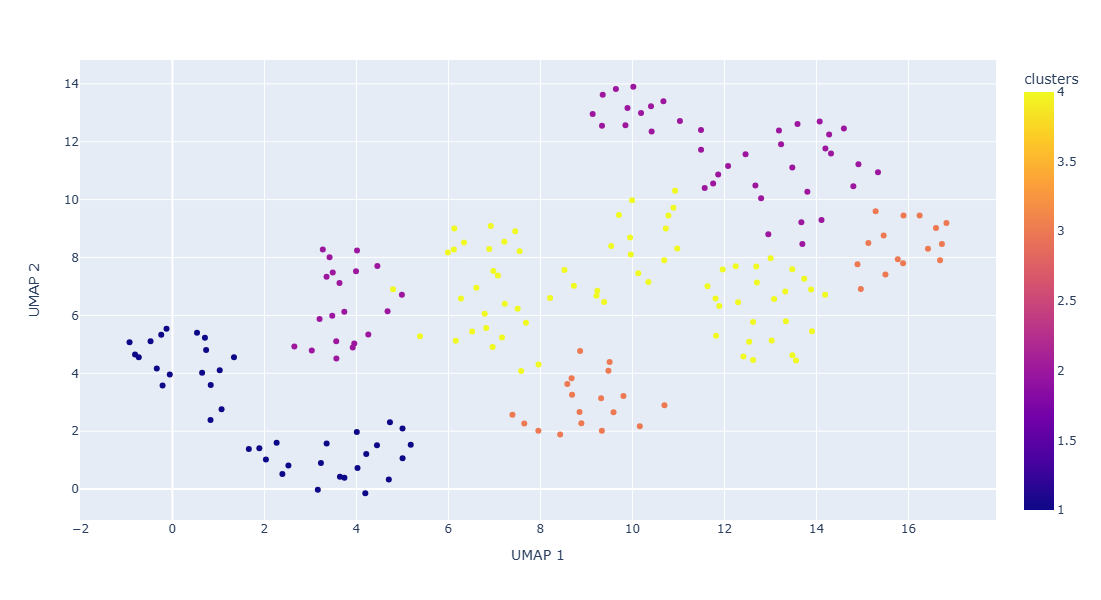

In [82]:
fig = px.scatter(
    plot_df,
    x='UMAP 1',
    y='UMAP 2',
    color='clusters',
    height=600,
    width=700
)
fig.show()

### t-SNE

In [83]:
from sklearn.manifold import TSNE

In [109]:
tsne = TSNE(n_components=2, perplexity=20, learning_rate=0.2, max_iter=500, random_state=42)

In [110]:
t_comps = tsne.fit_transform(X_scaled)

In [111]:
plot_df = pd.DataFrame(t_comps, columns=['TSNE 1','TSNE 2'])
plot_df['clusters'] = clusters

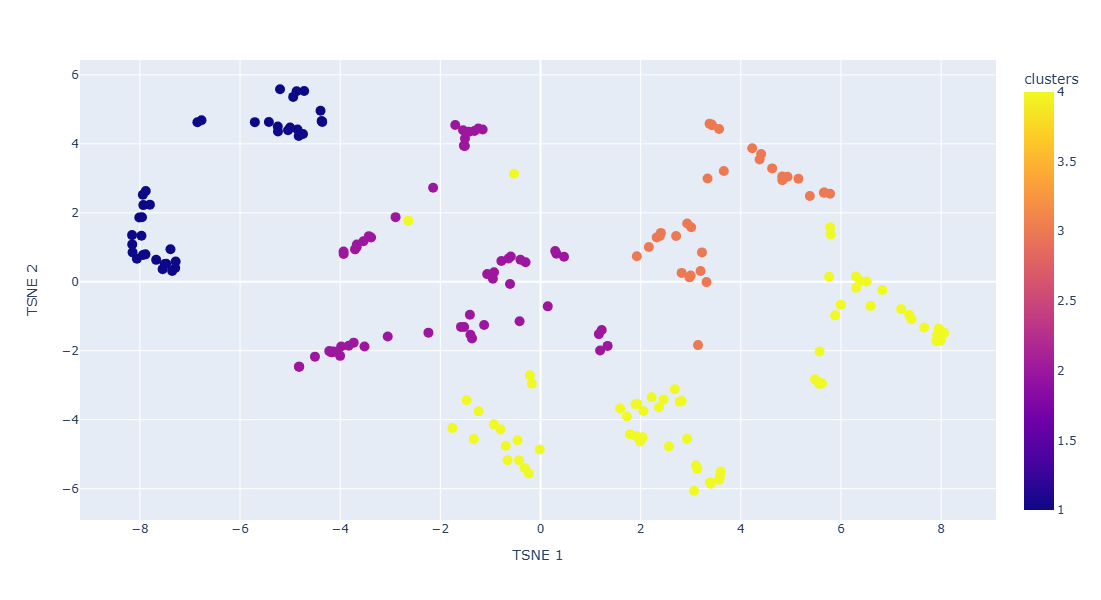

In [113]:
fig = px.scatter(
    plot_df,
    x='TSNE 1',
    y='TSNE 2',
    color='clusters',
    height=600,
    width=700
)
fig.update_traces(marker= dict(size=10))
fig.show()